# Описание проекта

Задача от интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. 

Момент анализа: декабрь 2016 г., 

Магазин планирует кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Цель проекта**
* Выявить определяющие успешность игры закономерности

**Задачи проекта**

* выяснить как менялись продажи по платформам,
* выявить актуальный период для анализа,
* выявить лидеров продаж игр по платформам,
* выявить есть ли связь между оценками пользователей и критиков с продажами,
* выяснить распределение игр по жанрам (релизы и продажи),
* составить топ-5 популярных игр по регионам (портрет пользователя каждого региона),
* проверить две гипотезы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    * Средние пользовательские рейтинги жанров Action и Sports разные

**План работы**
<a id="id_0"></a>

1. <a href="#id_1">Изучение данных</a>
2. <a href="#id_2">Предобработка</a>
3. <a href="#id_3">Исследовательский анализ данных</a>   
4. <a href="#id_4">Портрет пользователя каждого региона</a>
5. <a href="#id_5">Проверка гипотез</a>   
6. <a href="#id_6">Выводы</a>

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Очень хорошо, что ты добавляешь описание задач и активное оглавление - это упрощает понимание проекта для тех, кто с ним ознакамливается.</div>

## Изучение данных
<a id="id_1"></a>

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import numpy as np
from scipy import stats as st

warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.2f}'.format

In [2]:
try:
    data = pd.read_csv('games.csv') # локально
except:
    data = pd.read_csv('/datasets/games.csv') # в практикуме
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нашем распоряжении таблица с данными о выпущенных играх и их реализации.

Имеем датасет из 16715 строк.

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Из видимых проблем в датасете:
* большое число пропусков в столбцах;
* неудобный регистр названий у столбцов;
* неправильные типы данных по столбцам. 

<a href="#id_0">К плану</a>

## Предобработка данных 
<a id="id_2"></a>

### Коррекция названия столбцов
Откорректируем названия столбцов для более удобной работы с датасетом/

До:

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower()

После:

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Обработка наименований столбцов проведена корректно.

### Коррекция типов данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Год реализации продукта: целочисленное значение, можно изменить тип данных на int, однако так как в данных имеются пропуски это не представляется возможным (во всяком случае пока, возможно строки с пропусками в дальнейшем удалятся).

Оценка пользователей - данные должны быть типа float, изучим какие значения есть в этом столбце:

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце встречаются значения 'tbd' - "значение не определно", так как по сути это отсутствие данных, то эти значения можно заменить на пропуски - NaN, а затем изменить тип всех данных в столбце.

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Проверим результат:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [11]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, grid=True)
            .set_title('Содержание пропусков в данных, %' + "\n", fontsize = 22, color = 'SteelBlue') 
        );    
    except:
        print('пропусков нет')

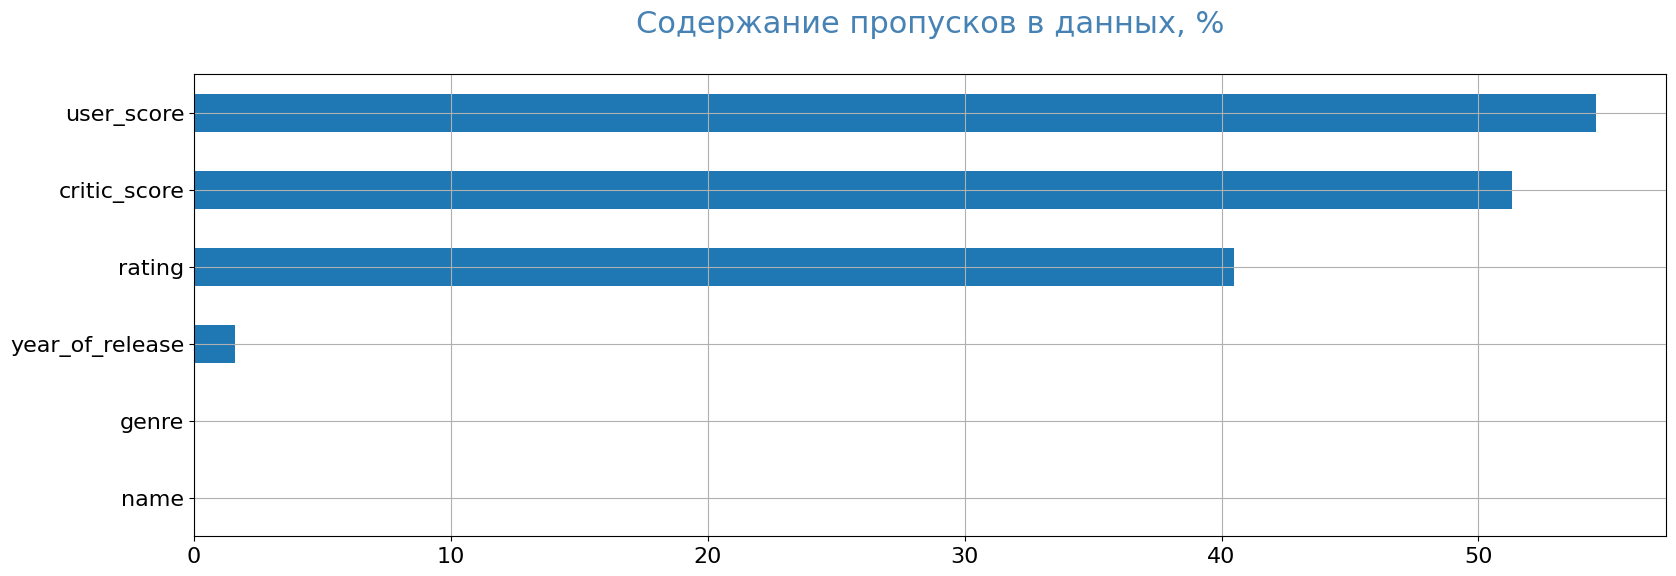

In [12]:
pass_value_barh(data)

Самое большое количество пропусков в столбце с оценками критиков, оценке пользователей. Эти пропуски заполнять не будем, оставим данные без изменений, т.к. заполнение такого количества пропусков средними или медианными значениями будет неверным. Далее заполним только столбец с рейтингом ESRB.

Причин для пропусков в столбцах с рейтингом и оценками может быть много, например игра оказалась не популярной и оценок пользователей не хватило для выборки. 

Делать что либо с этими пропусками не будем. Так как анализу эти пропуски не помешают.

Посмотрим количество пропусков в столбцах с малым количеством пропусков: `name`, `year_of_release`, `genre`:

In [13]:
def nan_check(column):
    for i in column:
        print(f"Колиество пропусков в столбце {i}:", data[i].isna().sum())
    return

nan_check(['name', 'year_of_release', 'genre'])
#print("Колиество пропусков в столбце 'name':", data['name'].isna().sum())
#print("Колиество пропусков в столбце 'year_of_release':", data['year_of_release'].isna().sum())
#print("Колиество пропусков в столбце 'genre':", data['genre'].isna().sum())

Колиество пропусков в столбце name: 2
Колиество пропусков в столбце year_of_release: 269
Колиество пропусков в столбце genre: 2


Так как количество строк с пропусками относительно всего датафрейма небольшое удалим эти строки и поменяем тип данных в столбце `year_of_release` на `int`.

In [14]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data['year_of_release'] = data['year_of_release'].astype('int')
nan_check(['name', 'year_of_release', 'genre'])

Колиество пропусков в столбце name: 0
Колиество пропусков в столбце year_of_release: 0
Колиество пропусков в столбце genre: 0


Займёмся заполнением пропусков в рейтинге ESRB. Для начала посмотрим какие значения встречаются в этом столбце

In [15]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Воспользуемся открытыми источниками, что бы выяснить что это за рейтинги:
* 'E' - Для всех
* 'M' - Для взрослых 17+
* 'T' - Подросткам 13+
* 'E10+' - Для всех от 10 лет и старше
* 'K-A' - Для всех (устаревшая категория)
* 'AO' - Только для взрослых 18+
* 'EC' - Для детей младшего возраста
* 'RP' - Рейтинг ожидается



Заменим пропуски в данных маркером NR - 'No Rating'

In [16]:
data.loc[data['rating'].isna(), 'rating'] = 'NR'

In [17]:
data['rating'].value_counts()

NR      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Суммарные продажи во всех регионах

In [19]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


<a href="#id_0">К плану</a>

## Анализ данных
<a id="id_3"></a>

### Количество выпускаемых игр
Оценим количество игр выпущенных в разные года.

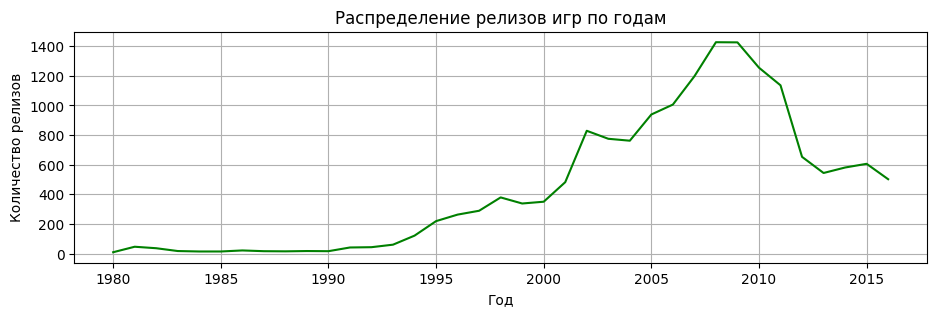

In [21]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='line', figsize=(11,3), color='green', grid=True)
plt.title('Распределение релизов игр по годам')
plt.ylabel('Количество релизов')
plt.xlabel('Год');
#plt.show()

Из графика видно что долгие годы с начала появления видеоигр их количество было не большим. 

Рывки в развитии этой индустрии приходятся на 1995, 1998, 2002 годы. Скорее всего они связаны с появлением и популяризацией новой платформы. 

Наблюдаем спад в количестве выпускаемых игр начиная с 2009 года. А это уже может быть связано с перенасыщением рынка.

Изучим как изменялось количество выпущенных видеоигр для каждой из платформ с течением времени. Возьмем данные с 1995 года.

In [22]:
platform_years = (
    data.query('year_of_release >= 1995')
    .pivot_table(index = 'platform', 
                 columns = 'year_of_release', 
                 values = 'name',
                 aggfunc='count',
                 fill_value=0,
                 )
)
platform_years

year_of_release,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DO,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3DS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,116,93,91,80,86,46
DC,0,0,0,7,14,20,8,1,0,0,...,1,1,0,0,0,0,0,0,0,0
DS,0,0,0,0,0,0,0,0,0,23,...,376,492,403,323,153,23,8,0,0,0
GB,4,6,8,8,11,17,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GBA,0,0,0,0,0,1,107,198,150,175,...,6,0,0,0,0,0,0,0,0,0
GC,0,0,0,0,0,0,22,152,144,83,...,4,0,0,0,0,0,0,0,0,0
N64,0,18,49,77,102,60,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
NG,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Очевидно, что имеются зависимые (одна и та же платформа, разные поколения) и независимые платформы, однако все имеют схожий жизненный цикл: появление платформы, активный выпуск новых релизов, устаревание. Например, платформы  PlayStation и Xbox сменяют друг друга от поколения к поколению.

### Изменение количества релизов по платформам

Изучим как изменялось количество выпущенных видеоигр для каждой из платформ с течением времени. 

Выберем топ-10 платформ по количеству проданных копий игр и посмотрим как они распределяются по годам.

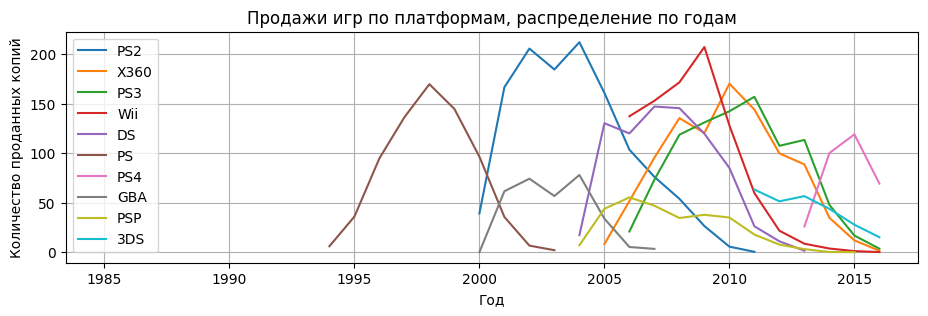

In [23]:
platform_years = (data
    .pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc='sum', margins=True)
    # нам нужен столбец с итогом
    [:-1] # костыль, убираем строку с итогом (не нашла как сделать быстро итог-столбец без итог-строки)
    .sort_values(by='All', ascending=False)
    [:10] #Топ-10
    .drop(columns = 'All') # да и сам столбец то нам кроме как для сортировки не нужен
    .T # без транспонирования не рисовался график как нужно
)
platform_years.plot(figsize=(11,3), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий')
plt.legend(loc='upper left')
plt.title('Продажи игр по платформам, распределение по годам')
plt.show()

Из графика видно, что цикл "жизни" платформы около 5 лет, а количество релизов до 91 года совсем несущественно.

### Актуальный период

Для целей прогнозирования продаж на следующий год в такой динамично меняющейся индустрии, как компьютерные игры не стоит брать слишком большой временной интервал - иначе обязательно в данные попадут уже отжившие тренды, которые зависят не только от выхода новой игровой платформы.

В данном случае возьмем период 2014-2016 гг - т.е. период в полных 3 года с сохранением данных за 2016 г. В этот период войдут умирающие платформы и только набирающие популярность.

Запишем новый датасет

In [24]:
act_data = data.query('year_of_release >= 2014')
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


### Лидеры продаж игр по платформам
Изучим какие платформы лидируют по продажам, растут и падают. Определим несколько потенциально прибыльных платформ.

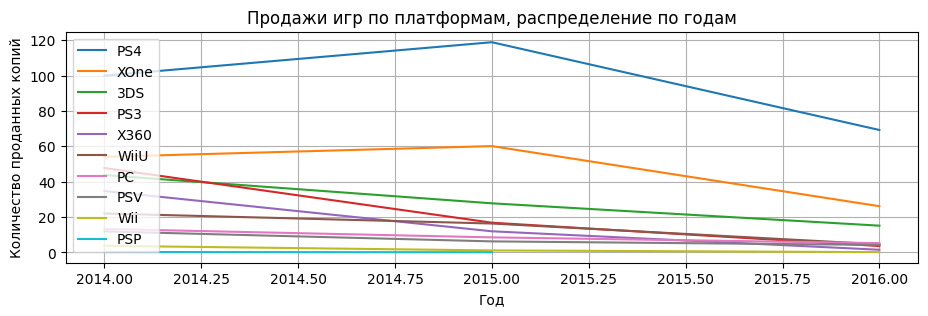

In [25]:
platform_years = (act_data                
    .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', margins=True)
    # нам нужен столбец с итогом
    [:-1] # костыль, убираем строку с итогом (не нашла как сделать быстро итог-столбец без итог-строки)
    .sort_values(by='All', ascending=False)
    [:10] #Топ-10
    .drop(columns = 'All') # да и сам столбец то нам кроме как для сортировки не нужен
    .T # без транспонирования не рисовался график как нужно
)
platform_years.plot(figsize=(11,3), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий')
plt.legend(loc='upper left')
plt.title('Продажи игр по платформам, распределение по годам')
plt.show()

По графику видно, что за последние 3 года популярность большинства платформ идет на спад.

Учитывая, что за 2016 год данные не полные, можно утверждать о росте продаж видеоигр для двух платформ - Play Station 3 и Xbox One. Так же на следующий 2017 может сохранить актуальность платформа Nintendo 3DS и PC, т.к. на Nintendo 3DS спрос падает медленно, а PC имеет относительно стабильные продажи на протяжении всего рассматриваемого периода (даже до актуализации периода). 

Создадим датасет `top_platform` в который войдут игры, выпущенные на платформах Play Station 4, Xbox One, Nintendo 3DS, PC.

In [26]:
top_platform = (act_data
                .query('platform == "PS4" or platform =="XOne" or platform =="PC" or platform == "3DS"')
                .reset_index(drop=True)
               )

### "Ящик с усами" по платформам
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

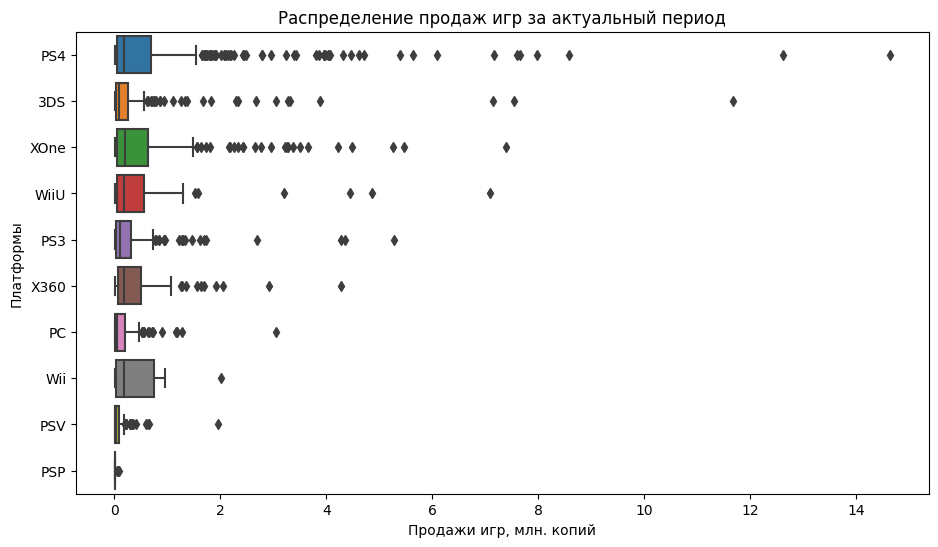

In [27]:
plt.figure(figsize=(11,6))

ax = sb.boxplot(x='total_sales', y='platform', data=act_data)
ax.set_ylabel('Платформы')
ax.set_xlabel('Продажи игр, млн. копий')
ax.set_title('Распределение продаж игр за актуальный период')
plt.show()

Посмотрим поближе распределение продаж у выделенных нами платформ Play Station 3, Xbox One, Nintendo 3DS, PC.
Ограничим значения до проданных 3 млн. копий.

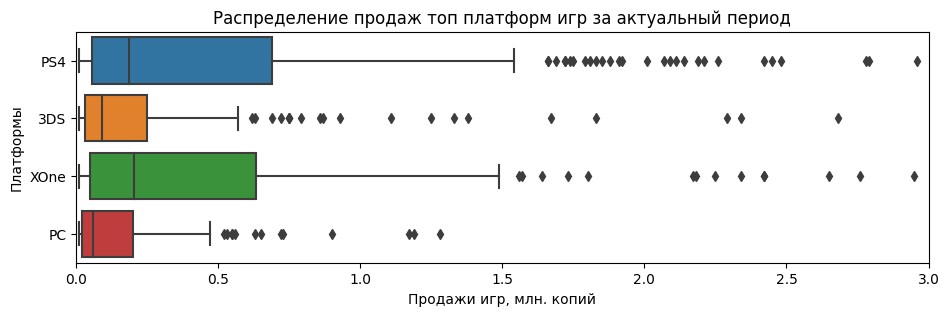

In [28]:
plt.figure(figsize=(11,3))

ax = sb.boxplot(x='total_sales', y='platform', data=top_platform)
ax.set_xlim(0, 3)
ax.set_ylabel('Платформы')
ax.set_xlabel('Продажи игр, млн. копий')
ax.set_title('Распределение продаж топ платформ игр за актуальный период')
plt.show()

По ящикам видно, что основная масса игр продается небольшим количеством копий, но таких игр много. У каждой платформы имеются выбросы - игры бестселлеры, которые продаются на "ура".

### Связь между продажами и оценками критиков и пользователей
Посмотрим как связаны продажи внутри популярных платформ и отзывы пользователей и критиков.

Построим диаграмму рассеяния:

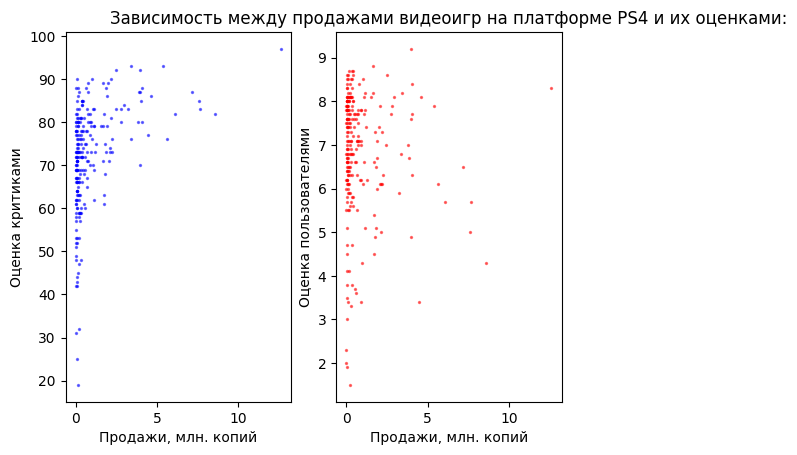

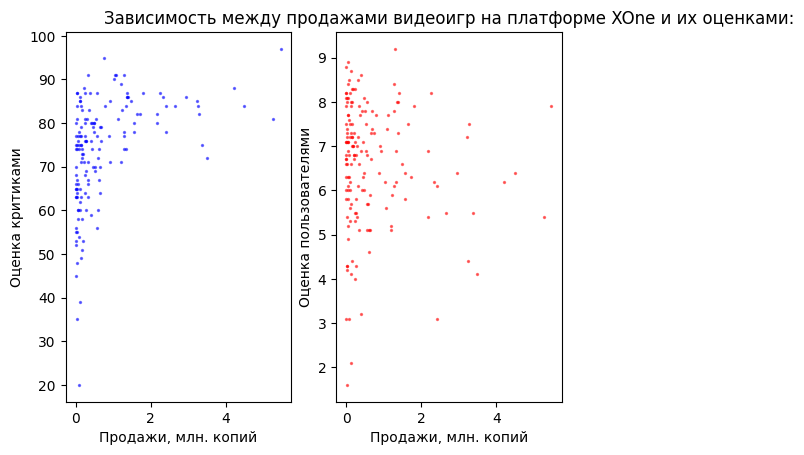

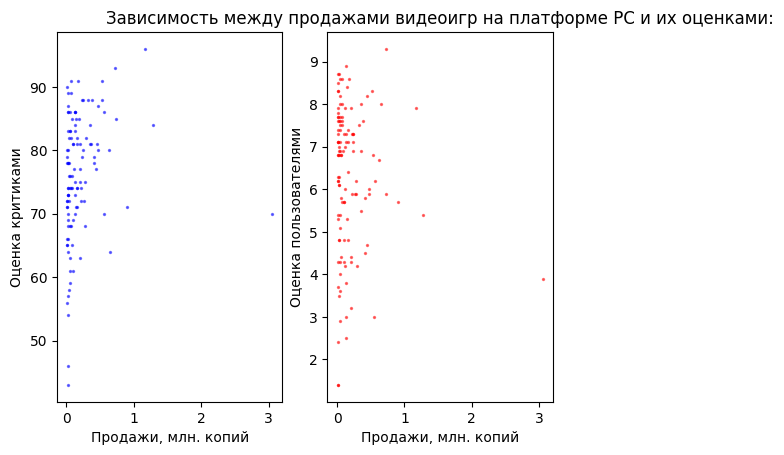

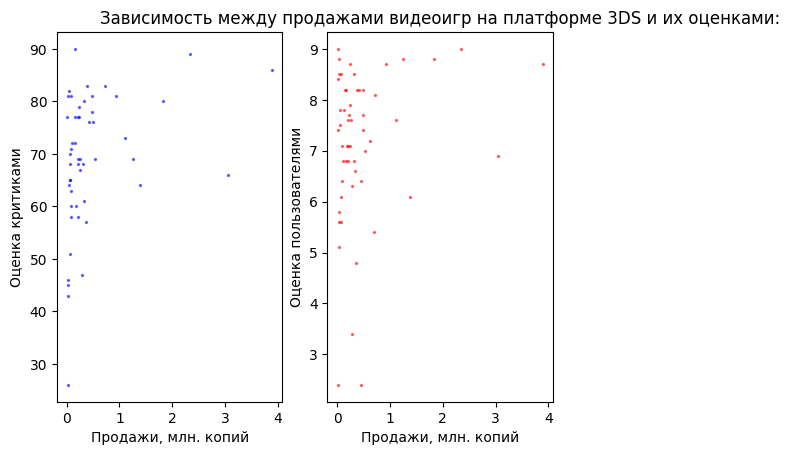

In [29]:
for i in ['PS4', 'XOne', 'PC','3DS']:
    fig, axes = plt.subplots(1, 2)
    
    act_data.loc[act_data['platform'] == i].plot(
        kind='scatter', 
        ax=axes[0],
        y='critic_score', 
        x='total_sales', 
        ylabel='Оценка критиками', 
        xlabel='Продажи, млн. копий', 
        alpha=0.5, 
        subplots=True, 
        c='b', 
        s=2,
        figsize = (5,5))
    
    act_data.loc[act_data['platform'] == i].plot(
        kind='scatter',
        ax=axes[1],
        y='user_score',
        x='total_sales',
        ylabel='Оценка пользователями',
        xlabel='Продажи, млн. копий',
        alpha=0.5,
        subplots=True,
        c='r',
        s=2,
        figsize = (5,5))
    
    
    plt.title(f'Зависимость между продажами видеоигр на платформе {i} и их оценками:')
    

Изучим корреляцию между продажами и оценками критиков и пользователей.

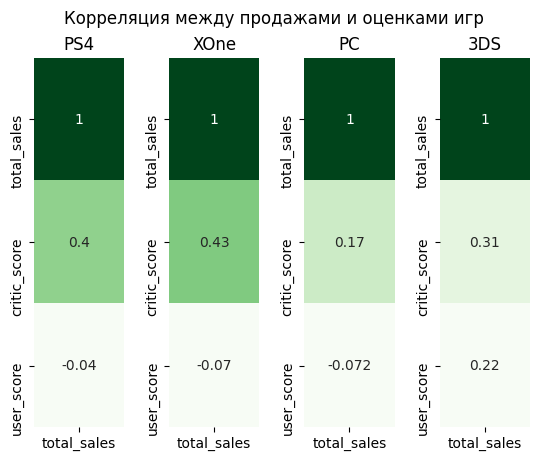

In [30]:
fig, axes = plt.subplots(1, 4)
plt.suptitle('Корреляция между продажами и оценками игр')
a = 0
for i in ['PS4', 'XOne', 'PC','3DS']:
    table = act_data.loc[act_data['platform'] == i, ['critic_score', 'user_score', 'total_sales']]
    sb.heatmap(table.corr()[['total_sales']].sort_values(by='total_sales', ascending=False),
               cmap="Greens",
               annot=True,
               cbar=False,
               ax=axes[a]
              )
    axes[a].set_title(i)
    a += 1
plt.subplots_adjust(wspace=0.5);

Очевидно что некоторая корреляция присутсвует, наиболее сильно она выражена между парой продажи/оценка критиков. Вероятно этот параметр более надежен, нежели оценки выставленные пользователями (часто пользователи оценки ставят по настроению). 

Так же стоит отметить что корреляция больше выражена у платформ, идущих "в гору" по популярности, это Play Station 4 и Xbox One.

### Соотношение выводов с продажами игр на других платформах.
Проверим наши выводы относительно корреляции на всех платформах за актуальный период:

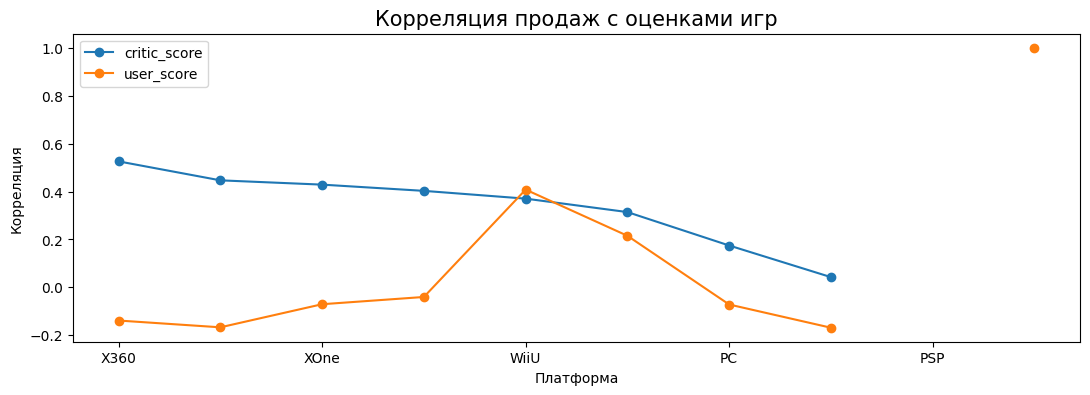

In [42]:
critic_score_corr = (act_data
 .pivot_table(index='platform', values=['critic_score','total_sales'], aggfunc='corr')
 .reset_index() # сбросим индексы, что бы избавиться от мульти-индекса
 .query('level_1 != "critic_score"') # уберем дубликаты строк-корелляции
 .drop(columns = ['total_sales', 'level_1']) #уберем лишние столбцы после корреляции
 .reset_index(drop=True) # еще раз сбросим индексы
 .sort_values(by='critic_score', ascending=False) # отсортируем данные по платформам в алфавитном порядке
)

user_score_corr = (act_data
 .pivot_table(index='platform', values=['user_score','total_sales'], aggfunc='corr')
 .reset_index() # сбросим индексы, что бы избавиться от мульти-индекса
 .query('level_1 != "user_score"') # уберем дубликаты строк-корелляции
 .drop(columns = ['total_sales', 'level_1']) #уберем лишние столбцы после корреляции
 .reset_index(drop=True)# еще раз сбросим индексы
)

critic_score_corr.merge(user_score_corr, on='platform').plot(x='platform', style='o-', figsize=(13,4))

plt.title('Корреляция продаж с оценками игр', fontsize=15)
plt.ylabel('Корреляция')
plt.xlabel('Платформа')
plt.show()
plt.show()

Из графика видно, что оценки критиков имеют наиболее высокую и, что главное, стабильную корреляцию с продажами игр по сравнению с оценками пользователей. Следовательно наши выводы, сделанные на топ-платформах оказались верными.

### Распределение игр по жанрам
Посмотрим на общее распределение игр по жанрам:

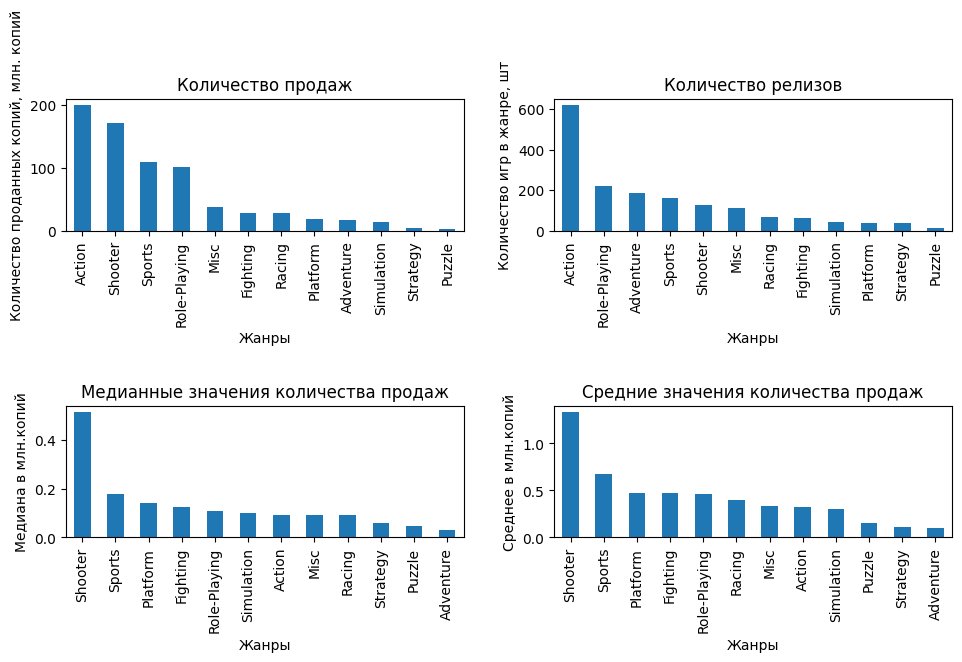

In [32]:
fig, axes = plt.subplots(2, 2)
fig. tight_layout(h_pad=10)

genre = act_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median'])
genre.columns = ['sum', 'count', 'mean', 'median']

(genre['sum']
 .sort_values(ascending=False)
 .plot(kind='bar', ax=axes[0,0], figsize = (10,5), title='Количество продаж',
       xlabel='Жанры', ylabel='Количество проданных копий, млн. копий')
);

(genre['count']
 .sort_values(ascending=False)
 .plot(kind='bar', ax=axes[0,1], figsize = (10,5), title='Количество релизов',
       xlabel='Жанры', ylabel='Количество игр в жанре, шт')
);

(genre['median']
 .sort_values(ascending=False)
 .plot(kind='bar', ax=axes[1,0], figsize = (10,5), title='Медианные значения количества продаж',
       xlabel='Жанры', ylabel='Медиана в млн.копий')
);

(genre['mean']
 .sort_values(ascending=False)
 .plot(kind='bar', ax=axes[1,1], figsize = (10,5), title='Средние значения количества продаж', 
       xlabel='Жанры', ylabel='Среднее в млн.копий')
);

* По количеству продаж выделяются жанры Action, Shooter, Role-Playing, Sports,  Misc.
* Среди жанров по количеству выпущенных игр выделяются жанры Action, Role-Playing, Adventure, Sports, Misc.

Можем сделать вывод, что, например, хоть игр в жанре приключения выпускается много - продаются они не очень.

Из средних и медианных значений самыми стабильными жанрами по доходу являются жанры: Shooter, Sports, Platform, Fighting, Role-Playing

Посмотрим какие видеоигры сделали продажи жанру Action

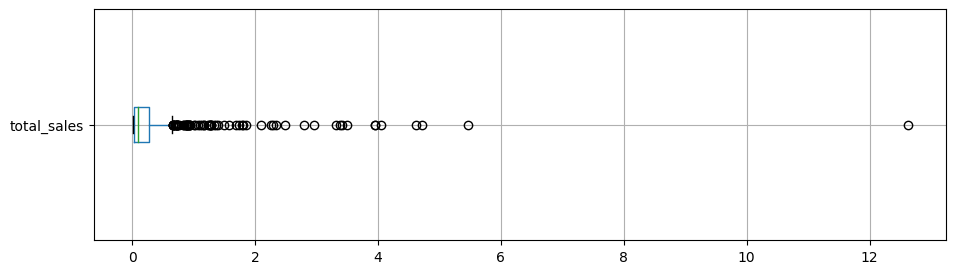

In [33]:
act_data.query('genre == "Action"').boxplot('total_sales', vert=False, figsize=(11,3));

In [34]:
act_data.query('genre == "Action" and total_sales>10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Ох уж эта GTA

<a href="#id_0">К плану</a>

## Портрет пользователя каждого региона 
<a id="id_4"></a>
Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)

Ответим на вопрос
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Заранее посмотрим как распределяются продажи по регионам:

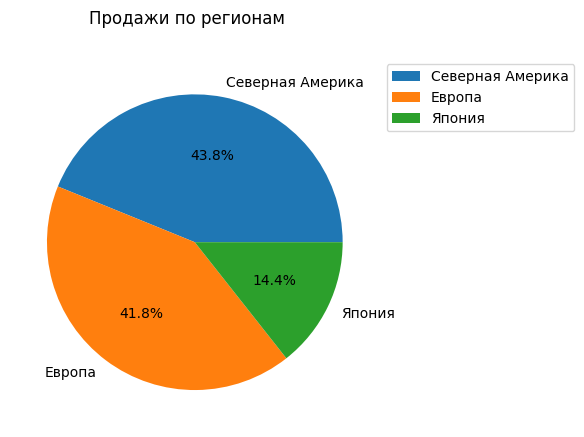

In [35]:
row_sales_region = [
    ['Северная Америка', act_data['na_sales'].sum()],
    ['Европа', act_data['eu_sales'].sum()],
    ['Япония', act_data['jp_sales'].sum()]
]

col_sales_region = ['name', 'sum']

sales_region = pd.DataFrame(data=row_sales_region, columns=col_sales_region).set_index('name')

sales_region.plot(kind='pie',
                  y='sum',
                  subplots=True,
                  autopct='%1.1f%%',
                  title='Продажи по регионам')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1));

Самое большое количество продаж происходит в Северной Америке, затем в Европе. Доля продаж в Японии сравнительно небольшая, следовательно приоритетней нас интересует портреты покупателей в Северной Америке и Европе.

In [36]:
# Построение диаграмм по платформам, жанрам и рейтингу для разных регионов

def platform_region(column): # column - столбец с продажами по конкретному региону
    
    plt.figure(figsize=(10, 10))
   
    #  ТОП-5 Платформы
    
    (act_data.groupby(by='platform').agg({column:'sum'}).sort_values(by=column, ascending=False).head(5)
     .plot(kind='pie', autopct='%1.1f%%', explode=[0.08, 0.03, 0.02, 0.01, 0], subplots=True, 
           figsize=(3,3),
           ax=plt.subplot(2, 2, 1)))   
    plt.title('Топ 5 платформ', fontsize=15)
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, 1))
    
     #  ТОП-5 Жанры
    (act_data.groupby(by='genre').agg({column:'sum'}).sort_values(by=column, ascending=False).head(5)
     .plot(kind='pie', subplots=True, autopct='%1.1f%%', explode=[0.08, 0.03, 0.02, 0.01, 0], figsize=(3,3), ax=plt.subplot(2, 2, 2))) 
    plt.title('Топ 5 жанров', fontsize=15)
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, 1))
    
    plt.subplots_adjust(wspace=0.5, hspace=0)
    plt.show()
    
    #  Рейтинг    
    platform_region = act_data.pivot_table(index='rating', values=column, aggfunc=['sum'])
    platform_region.columns = ['sum']
    (platform_region['sum'].sort_values(ascending=False)
        .plot(kind='barh', figsize=(12, 3)))
    plt.title('Топ продаж игр по рейтингу ESRB', fontsize=15)
    plt.ylabel('Количество проданных игр, млн. копий')
    plt.xlabel('Рейтинг ESRB')
    plt.show()
    # Пробобвала циклом, что бы не повторять код, но никак не хотело запихиваться в один axes

### Портрет пользователя Северной Америки 

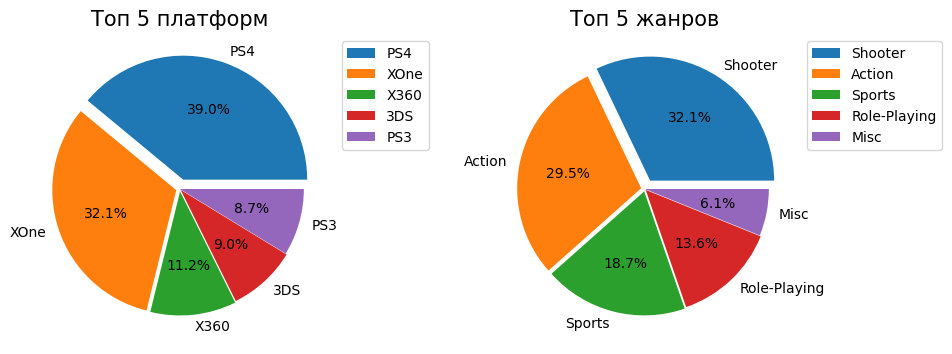

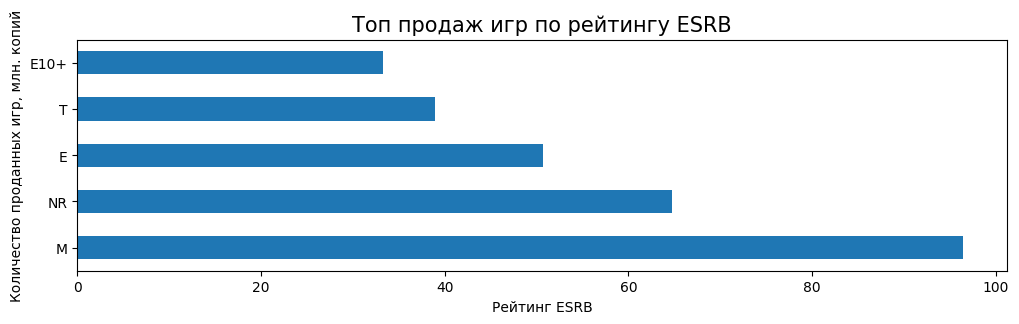

In [37]:
platform_region('na_sales')

В Северной америке наибольшей популярностью пользуются платформы: Xbox 360, PlayStation 3, PlayStation 4, Xbox One и Nintendo 3DS. Приставки старого поколения еще не успели уйти на пенсию, а нового поколения набрать популярность и выпуститьдостаточное количество игр.

В жанрах выделяются Action - экшн (треть всех игр в топе), Shooter - шутеры, Sports - спортивные игры, Role-Playing - ролевые игры и Misc - игры с смешаным жанром. 

Чаще всего пользователи выбирают игры рейтинга  M - для взрослых 17+, затем идут игры без рейтинга, затем игры для всех, для тех кто старше 10 и тех, кто старше 13.

### Портрет пользователя Европы 

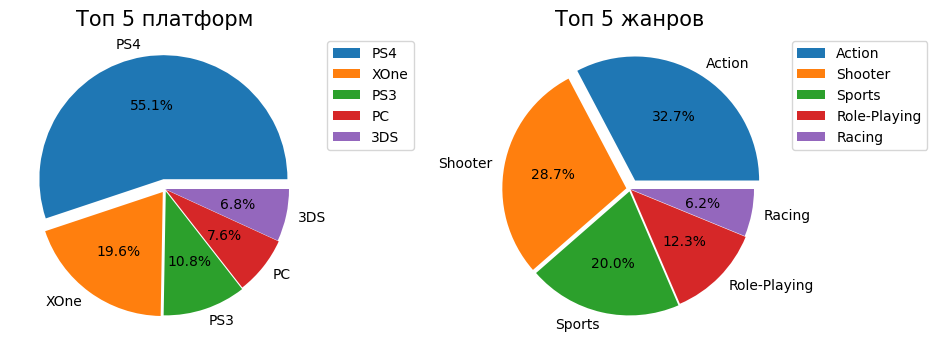

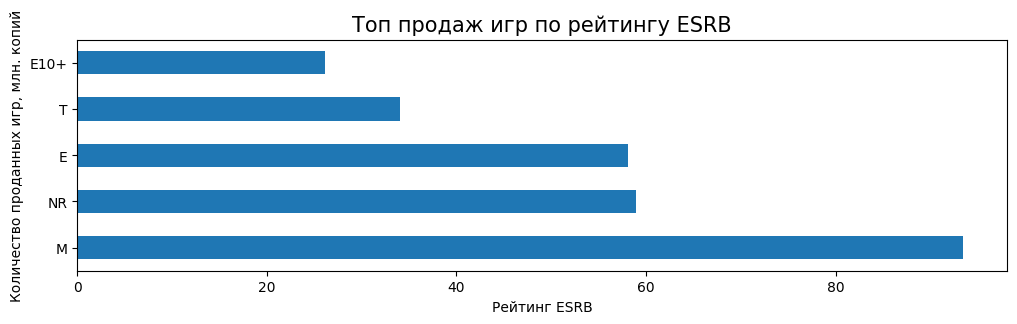

In [38]:
platform_region('eu_sales')

В Европе наибольшей популярностью пользуются платформы серии PlayStation (3 и 4), Xbox 360, Nintendo 3DS и PC. В отличае от Северной америки, тут предпочитают PS Xbox'у. 

В жанрах так же как и в Северной Америке выделяются Action, Shooter, Sports, Role-Playing. На 5ом месте в топе тут Racing - гонки. 

Картина по рейтингу схожая, местами поменялись только рейтинги 10+ и 13+, но так как они близки друг к другу, можно сказать что в рейтинге картина получилась одинаковой и у Европы и у Северной Америки.

### Портрет пользователя Японии

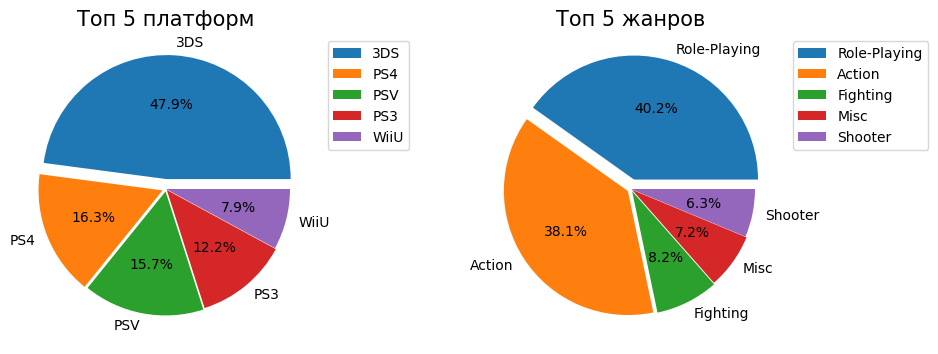

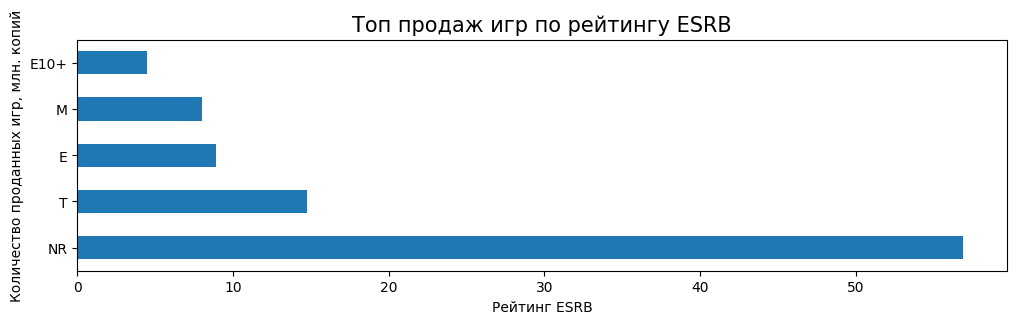

In [39]:
platform_region('jp_sales')

В японии сильно выражена своя культура даже в том, что касается техники и игр. 

Самой популярной платформой в Японии является Nintendo 3DS - почти 50% выборки топа. остальные 4 места поделили продукты платформы Play Station.

В жанрах так же явные отличия от предпочтений в Европе и Северной Америке, тут пользователи предпочитают игры в жанре Role-Playing (RPG) - 43% выборки.

Японцы играют в игры без рейтинга. Возможно это связано с тем, что в Японии своя рейтинговая система оценки игр. В отличае от Европы и Северной Америки в Японии более популярны игры с рейтингом для всех и для тинейджеров - 13+. Игры для взрослых тут только на 3м месте. Значит в данном регионе ESRB не влияет на продажи.

<a href="#id_0">К плану</a>

## Проверка гипотез 
<a id="id_5"></a>
Проверим две гипотезы: 
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

Так как сравниваемые выборки независимы между собой (рейтинги не зависят друг от друга) используем t-критерий Стьюдента.

Для наиболее тоного результата сравним дисперсии выборок, и подставим результат в параметр `equal_var` метода `st.stats.ttest_ind`, т.к. есть сомнения по равнозначности выборок.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

*Нулевая гипотеза:* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Альтернативная гипотеза:* Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [40]:
alpha = 0.05

xone_rating = act_data.query('platform == "XOne" and user_score > 0')['user_score']
pc_rating = act_data.query('platform == "PC" and user_score > 0')['user_score']

equal_var = xone_rating.var(ddof=1) == pc_rating.var(ddof=1)

results = st.ttest_ind(xone_rating, pc_rating, equal_var=equal_var)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


Различие средних значений пользовательского рейтинга игр на двух платформах статистически не значимо, следовательно нам не удалось опровергнуть нулевую гипотезу.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [41]:
alpha = 0.05

action_rating = data.query('genre == "Action" and user_score > 0')['user_score']
sports_rating = data.query('genre == "Sports" and user_score > 0')['user_score']

equal_var = action_rating.var(ddof=1) == sports_rating.var(ddof=1)

results = st.ttest_ind(action_rating, sports_rating, equal_var=equal_var)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.07370217419278534
Отвергаем нулевую гипотезу


Различие средних значений пользовательского рейтинга игр двух жанров статистически не значимо, следовательно нулевую гипотезу мы отвергаем.

## Общий вывод
<a id="id_6"></a>

**Итоги выполнения задач:**
* Все платформы имеют схожий жизненный цикл: появление платформы, увеличение количества релизов, устаревание платформы. Часто это связано со сменой поколения одной и той же платформы (PlayStation, Xbox, Nintendo).
* За актуальный период удобно взять период в 5 лет: завершение цикла для одних платформ и расцвет других.
* В последние 5 лет наиболее актуальным становятся платформы Play Station 3 и Xbox One - у них идет подъем популярности, увеличивается число релизов.  Nintendo 3DS и PC так же могут остаться актуальными, т.к. у Nintendo идет плавный спад популярности, в то время как PC сохраняет свою популяционную нишу на протяжении периода намного превышающего 5 лет.
* Для каждой платформы выпускается огромное количество продуктов, в большинстве своем количество проданных копий для них так же небольшое. Однако стоит отметить так же наличие бестселлеров с большим количеством проданных копий для каждой платформы. 
* Наиболее популярными жанрами по продажам выделяются жанры Action, Shooter, Role-Playing, Sports, Misc.
* Среди жанров по количеству выпущенных игр выделяются жанры Action, Role-Playing, Adventure, Sports, Misc.
* Самые стабильные в плане прибыльности жанры Shooter, Sports, Platform, Fighting, Role-Playing
* Жанр игры с самым большим количеством релизов и продаж - Action.
* Количество продаж больше всего коррелирует с оценками критиков.
* Портреты пользователей:
    * В Северной Америке и Европе портреты типичных пользователей схожи, там больше предпочитают платормы Play Station и Xbox, в то время как в Японии подавляющее большинство пользователей предпочитают Nintendo.
    * По жанрам так же в Европе и Северной Америке схожие предпочтения: Action, Shooter, Sports, Role-Playing. В Японии же самым предпочтительным жанром является RPG.
    * По рейтингу картина в Северной Америке и Европе схожая, пользователи чаще покупают игры рейтинга M - для взрослых 17+, затем идут игры для всех, для 10+ и 13+. В Японии же чаще покупаются игры без рейтинга, для всех и 13+, только потом 17+.
    
**Проверка гипотез:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    * Различие средних значений пользовательского рейтинга игр на двух платформах статистически не значимо, следовательно нам не удалось опровергнуть нулевую гипотезу.
* Средние пользовательские рейтинги жанров Action и Sports разные
    * Различие средних значений пользовательского рейтинга игр двух жанров статистически не значимо, следовательно нулевую гипотезу мы отвергаем.
    
**Вывод:**

Целью данного проекта было выявление закономерностей успешности игры.

В ходе анализа выяснилось, что на основе данных за наиболее актуальный период в 5 лет круг потенциально популярных продуктов может быть определен следующим образом.

Игры на платформах:
* Play Station 3
* Xbox One
* Nintendo 3DS
* PC
    
Игры в жанрах:
* Shooter
* Sports
* Platform
* Fighting
* Role-Playing

При выборе популярных продуктов следует обращать внимание на оценки критиков, а не пользователей, т.к. профессиональные критики более четко формируют отзывы на продукты.

Так же ориентироваться следует в большей степени на пользователей Северной Америки и Европы, т.к. в этих регионах преобретается наибольшее количество копий игр.

Наиболее покупаемыми будут игры возрастных категорий 17+, 13+ и для всех.

<a href="#id_0">К плану</a>